In [47]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #encode 
from sklearn.preprocessing import Normalizer #normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [48]:
df = pd.read_csv('adultIncome.csv') #อ่านไฟล์ dataset ของเรา
df.head() #แสดง dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [49]:
df.shape #แสดงขนาดของ dataset 

(500, 15)

In [50]:
df.isnull().sum().any() #เช็คว่ามี ค่า Null หรือไม่ 

False

Code ด้านล่างนี้คือการตัดข้อมูลที่มีค่า ในบาง colums เป็น เครื่องหมาย ? หลังจากนั้น ก็จะเช็ค shape อีกครั้ง ที่ตัดอออกเนื่องจาก ลองใช้การแทนที่ดู หรือ .replace  มันมีส่วนที่ส่งผลกับการนำไปทำนายด้วย จึงตัดออก 

In [51]:
df = df.drop(df[df.isin(['?']).any(1)].index)

In [52]:
df.shape

(460, 15)

In [53]:
def object_cols(df):
    return list(df.select_dtypes(include='object').columns) #เลือก datatypes ที่เป็นตัวหนังสือหรือ Object ออกมา
def numerical_cols(df):
    return list(df.select_dtypes(exclude='object').columns) #เลือก datatypes ที่เป็นตัวเลขออกมา


In [54]:
obj_col = object_cols(df)
num_col = numerical_cols(df)
lbnc = LabelEncoder() #เปลี่ยนข้อมูลจาก ตัวหนังสือ ให้เป็นตัวเลข  เรียงตามค่าไปเรื่อยๆ 0,1,2,.... ตามขอบเขต้อมูล
for col in obj_col:
    df[col] = lbnc.fit_transform(df[col]) # วน for loop เพื่อเปลี่ยนค่า ที่เป็นตัวหนังสือ ให้เปลี่ยนเป็นตัวลำดับตัวเลข

In [55]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,18,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,18,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,18,1
3,44,2,160323,14,10,2,6,0,2,1,7688,0,40,18,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,18,0


In [56]:
norm = Normalizer()
df[num_col] = norm.fit_transform(df[num_col]) 
#ปรับช่วงข้อมูลให้อยู่ในช่วง[0, 1]ด้วยการนำข้อมูลในคอมลัมน์ตัวนั้นลบด้วยค่าที่น้อยที่สุด (Min) ของมันแล้วหารด้วยช่วงของข้อมูลนั้น (Max – Min)

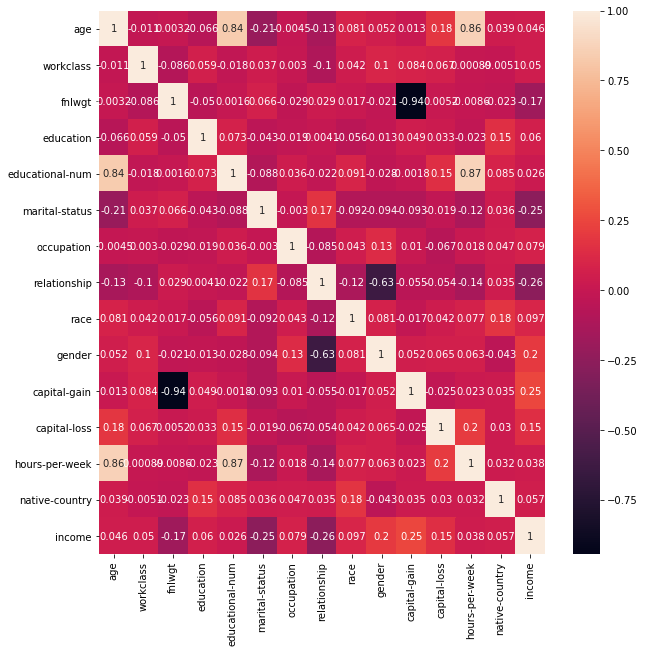

In [57]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

ใน heatmap คือการแสดงค่าความสัมพันธ์ว่าข้อมูลแต่ละตัว มีความสัมพันธ์กันขนาดไหน ในส่วนของ project นี้ เราจะได้แค่ช่อง income ในแนวแกน Y หรือแนวตั้ง ซึ่งจากที่ได้plot ออกมาดู ทำให้เห็นว่า มีหลายตัว ใน Data set ที่ไม่ค่อยส่งผล หรือไม่ค่อยมีความสัมพันธ์กับตัว Income ในแนวแกน X เท่าไหร่ จึงทำการตัด บาง Feature ออกไป เช่น fnlwgt,workclass,age,education-num,relationship,race เป็นต้น ดัง Code ในรรทัดด้านล่างนี้

In [58]:
df = df.drop(['fnlwgt','workclass','age','educational-num','relationship','race'],axis=1)

In [59]:
x = df.drop(['income'],axis=1)
y = df['income'].values

Code ด้านล่าง จะเป็นการ เปรียบเทียบ Algorithm ในการใช้ทำนาย 2 ตัว ซึ่งคือ K-NN และ LogisticRegression
ซึ่งผลลัพธ์ที่ออกมา ค่า Accuracy ของการใช้ K-NN มีความแม่นยำกว่า

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
knn = KNeighborsClassifier(n_neighbors= 10)
model = LogisticRegression()

In [61]:
knn_fit =knn.fit(x_train,y_train)

In [62]:
test = x_test[:1]
print("Predict is {0}".format(knn_fit.predict(test)))

Predict is [0]


In [63]:
test

,education,marital-status,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country
358,7,4,10,1,0.0,0.0,0.000267,18


In [64]:
knn.score(x_test,y_test)

0.8043478260869565

In [65]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7934782608695652